In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('supply.csv')

# Convertir la columna DATE a formato datetime
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Reemplazar posibles comas por puntos y eliminar cualquier otro carácter no numérico
# Suponiendo que las comas son separadores de miles y deben ser eliminadas
df1 = df1.replace({',': ''}, regex=True)

# Convertir las columnas numéricas a float, ignorando errores
for column in df1.columns:
    if column != 'DATE':  # No convertir la columna DATE
        df1[column] = pd.to_numeric(df1[column], errors='coerce')

# Eliminar filas con valores NaN resultantes de la conversión
df1 = df1.dropna()
df1_clean = df1.drop(columns=['DATE'])


In [2]:
mean = df1_clean.mean()
median = df1_clean.median()
mode = df1_clean.mode().iloc[0]
variance = df1_clean.var()
std_dev = df1_clean.std()
renge_ = df1_clean.max() - df1_clean.min()

In [15]:
# Calcular y mostrar la matriz de correlación
corr_matrix = df1.corr()
print("Matriz de Correlación:")
corr_matrix

Matriz de Correlación:


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
DATE,1.000000,0.741458,-0.022609,-0.129597,0.440010,-0.213582
CSUSHPISA,0.741458,1.000000,0.121782,0.382354,0.882204,-0.592952
MSACSR,-0.022609,0.121782,1.000000,-0.465049,-0.135552,0.441253
PERMIT,-0.129597,0.382354,-0.465049,1.000000,0.762928,-0.834793
TLRESCONS,0.440010,0.882204,-0.135552,0.762928,1.000000,-0.822951
EVACANTUSQ176N,-0.213582,-0.592952,0.441253,-0.834793,-0.822951,1.000000


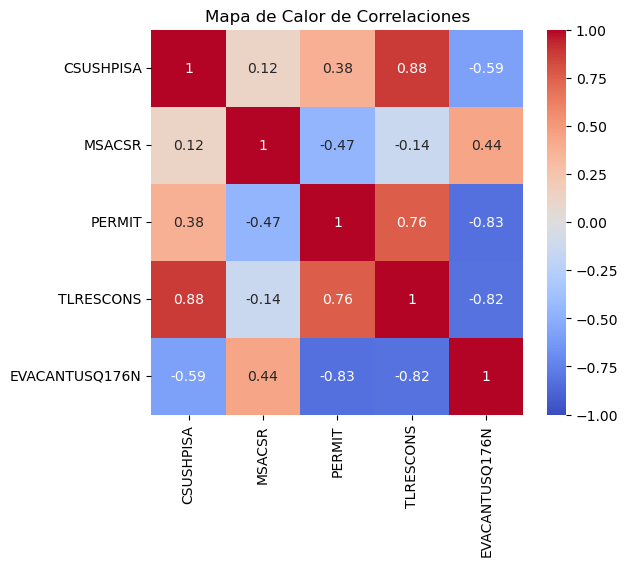

In [4]:
# Crea el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Interpretación de la Matriz de Correlación
DATE:

Tiene correlaciones positivas moderadas con CSUSHPISA (0.741) y TLRESCONS (0.440).
Tiene correlaciones negativas con PERMIT (-0.130) y EVACANTUSQ176N (-0.214).
CSUSHPISA:

Tiene una fuerte correlación positiva con TLRESCONS (0.882), sugiriendo que cuando los precios de las viviendas aumentan, el gasto en construcción residencial también tiende a aumentar.
Tiene una correlación negativa con EVACANTUSQ176N (-0.593), indicando que a medida que los precios de las viviendas suben, la cantidad de viviendas vacantes tiende a bajar.
MSACSR:

Muestra una correlación negativa significativa con PERMIT (-0.465), lo que sugiere que una mayor oferta de nuevas casas puede estar asociada con una menor oferta mensual de nuevas casas.
Tiene una correlación positiva con EVACANTUSQ176N (0.441), indicando que una mayor oferta mensual de nuevas casas podría estar asociada con un aumento en la cantidad de viviendas vacantes.
PERMIT:

Tiene una fuerte correlación positiva con TLRESCONS (0.763), lo que sugiere que un aumento en los permisos de construcción se asocia con un aumento en el gasto en construcción residencial.
Tiene una fuerte correlación negativa con EVACANTUSQ176N (-0.835), indicando que a medida que aumentan los permisos de construcción, disminuye la cantidad de viviendas vacantes.
TLRESCONS:

Tiene una fuerte correlación negativa con EVACANTUSQ176N (-0.823), indicando que un mayor gasto en construcción está asociado con una menor cantidad de viviendas vacantes.
EVACANTUSQ176N:

Tiene una correlación negativa significativa con CSUSHPISA (-0.593) y PERMIT (-0.835), lo que indica que una mayor cantidad de viviendas vacantes está asociada con menores precios de viviendas y menos permisos de construcción.
Resumen de Hallazgos
CSUSHPISA y TLRESCONS están fuertemente correlacionados, lo que sugiere que el gasto en construcción residencial sigue los precios de las viviendas.
PERMIT y TLRESCONS están positivamente correlacionados, indicando que el aumento en los permisos de construcción impulsa el gasto en construcción.
EVACANTUSQ176N tiene correlaciones negativas significativas con CSUSHPISA, PERMIT y TLRESCONS, sugiriendo que un aumento en las viviendas vacantes está asociado con una disminución en los precios de viviendas, permisos de construcción y gasto en construcción.

Con base en las definiciones de tus variables y la matriz de correlación proporcionada, aquí tienes algunas conclusiones sobre cómo se relacionan entre sí:

Relación entre Precios de Viviendas (CSUSHPISA) y Gasto en Construcción (TLRESCONS):

Correlación: 0.882 (alta positiva)
Interpretación: Existe una relación muy fuerte entre la variación en los precios de las viviendas y el gasto total en construcción residencial. Esto sugiere que a medida que aumentan los precios de las viviendas, el gasto en construcción residencial también tiende a aumentar, lo que puede indicar que la construcción se adapta a la demanda creciente en un mercado de viviendas en alza.
Relación entre Nuevas Construcciones Autorizadas (PERMIT) y Gasto en Construcción (TLRESCONS):

Correlación: 0.763 (alta positiva)
Interpretación: También hay una relación positiva fuerte entre el número de nuevas construcciones autorizadas y el gasto en construcción. Esto implica que a medida que se autorizan más construcciones, el gasto en construcción residencial aumenta, lo cual es lógico ya que más construcciones autorizadas generalmente requieren más inversión.
Relación entre Nuevas Construcciones Autorizadas (PERMIT) y Oferta de Viviendas (MSACSR):

Correlación: -0.465 (moderada negativa)
Interpretación: Hay una correlación negativa moderada, lo que sugiere que a medida que aumenta el número de nuevas construcciones autorizadas, la cantidad de nuevas viviendas disponibles en el mercado puede disminuir. Esto podría reflejar un desfase temporal entre la autorización y la disponibilidad real de viviendas, o podría indicar que las viviendas recién construidas no se están añadiendo rápidamente al mercado.
Relación entre Nuevas Construcciones Autorizadas (PERMIT) y Viviendas Vacantes (EVACANTUSQ176N):

Correlación: -0.835 (alta negativa)
Interpretación: Existe una relación negativa fuerte entre el número de nuevas construcciones autorizadas y el número de viviendas vacantes. Esto sugiere que un aumento en las nuevas construcciones tiende a reducir la cantidad de viviendas vacantes, posiblemente porque la nueva oferta está absorbiendo parte de la demanda y reduciendo la vacancia.
Relación entre Oferta de Viviendas (MSACSR) y Viviendas Vacantes (EVACANTUSQ176N):

Correlación: 0.441 (moderada positiva)
Interpretación: La correlación moderada positiva entre la oferta de nuevas viviendas y las viviendas vacantes indica que, a medida que aumenta la oferta de viviendas, también puede aumentar el número de viviendas vacantes. Esto puede reflejar un exceso de oferta en relación con la demanda actual.
Relación entre Precios de Viviendas (CSUSHPISA) y Viviendas Vacantes (EVACANTUSQ176N):

Correlación: -0.214 (baja negativa)
Interpretación: La relación entre los precios de las viviendas y el número de viviendas vacantes es débilmente negativa. Esto podría sugerir que los precios no tienen un impacto significativo en la vacancia de viviendas, o que otros factores están influyendo más en la disponibilidad de viviendas.
Relación entre Oferta de Viviendas (MSACSR) y Gasto en Construcción (TLRESCONS):

Correlación: -0.136 (baja negativa)
Interpretación: La baja correlación negativa sugiere que la relación entre la oferta de nuevas viviendas y el gasto en construcción es bastante débil. Esto puede indicar que el gasto en construcción no está directamente relacionado con la cantidad de oferta de viviendas disponibles.
En resumen, tus datos muestran una fuerte relación entre los precios de las viviendas y el gasto en construcción, y también entre las nuevas construcciones autorizadas y el gasto en construcción. Además, las nuevas construcciones autorizadas tienen un impacto notable en la reducción de viviendas vacantes. La relación entre la oferta de viviendas y la vacancia, así como entre la oferta y el gasto en construcción, es menos clara. Esto puede reflejar complejidades en el mercado de vivienda que podrían requerir un análisis más profundo para entender las dinámicas exactas.

In [13]:
# Calcular y mostrar la matriz de covarianza
cov_matrix = df1.cov()
print("\nMatriz de Covarianza:")
cov_matrix


Matriz de Covarianza:


,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
DATE,3.353335e+34,5.622582e+18,-7.956292e+15,-1.138948e+19,1.428468e+22,-5.371287e+19
CSUSHPISA,5.622582e+18,1.714830e+03,9.691200e+00,7.598801e+03,6.476632e+06,-3.372127e+04
MSACSR,-7.956292e+15,9.691200e+00,3.692932e+00,-4.288973e+02,-4.618068e+04,1.164522e+03
PERMIT,-1.138948e+19,7.598801e+03,-4.288973e+02,2.303236e+05,6.491160e+07,-5.502023e+05
TLRESCONS,1.428468e+22,6.476632e+06,-4.618068e+04,6.491160e+07,3.142962e+10,-2.003632e+08
EVACANTUSQ176N,-5.371287e+19,-3.372127e+04,1.164522e+03,-5.502023e+05,-2.003632e+08,1.886030e+06
